# US-Workshop (2023): ULTRASOUND BASICS
<hr/>

## EX1: Pulse-echo technique in Non-Destructive Testing (NDT)
* Pulse-echo technique was one of the very first practical ultrasound application in underwater acoustics and Non-destructive testing!
* In this notebook we process NDT ultrasound RF datasets acquired using multi-element Phased-Array probe on steel test blocks.
* The RF pulse-echo data has been acquired using aperture sizes of 1, 2, 4, 8, and 16-elements.

### TOC
* [EXPERIMENTAL SETUP](#experimental-setup)
* [PULSE-ECHO RF SIGNALS](#pulse-echo-rf-signals)
* [ENVELOP DETECTION](#envelop-detection)

### LINKS
1. [Evident, Introduction to Phased Array Ultrasonic Testing](https://www.olympus-ims.com/en/ndt-tutorials/intro/ut/)
2. [Tim ARMITT, Phased Arrays Not The Answer To Every Application](https://www.ndt.net/article/ecndt2006/doc/We.3.1.3.pdf)

[![Lab4US](../figs/Lab4US-banner-EN-800.png)](https://lab4us.eu)
<hr/>

## EXPERIMENTAL SETUP
We have used ultrasound research system us4R-lite connected to a 128-elem phased-array NDT probe.

The setup consists of:

* Phased-Array probe:
    - 128 elements, pitch 0.5mm
    - frequency 10MHz
* TX/RX schemes:
    - 128 x (1 TX / 1 RX) — aperture=0.5mm
    - 127 x (2 TX / 2 RX) — aperture=1mm
    - 125 x (4 TX / 4 RX) — aperture=2mm
    - 121 x (8 TX / 8 RX) — aperture=4mm
    - 113 x (16 TX / 16 RX) — aperture=8mm
    - 128 x (1 TX / 128 RX) — STA (Synthetic Transmit Aperture) — full RX aperture
* Standard NDT test/calibration blocks made of steel:
    - Speed-of-sound: 
        - 5920 m/s for L-wave (longitudinal)
        - 3255 m/s for T-wave (transverse)
    - Phased-Array test block
    
    ![Experimental setup](../figs/ndt-pa-test-block.jpg)

    -  V1 / IIW-Type 1 test block

    ![Experimental setup](../figs/ndt-w1-test-block.jpg)
* Acquired DATA:
    - raw RF echo signal sampled @ 65MSPS, 14-bit per sample packed in 2-bytes (data type: short)
    - 4096 depth samples


## PULSE-ECHO RF SIGNALS

In [21]:
import numpy as np
from display_scans import *

In [22]:
#%% LOAD RF data for 1TX / 1RX
arr = np.load(r'../data/ex1-pulse-echo/tx1rx1-v1-block.npy')    # 1 TX / 1 RX on V1 block
print(arr.shape)
arr = np.squeeze(arr)
print(arr.shape)        # arr dimensions: 0: Acq number (scanline); 1: RF samples

(1, 128, 4096, 1)
(128, 4096)


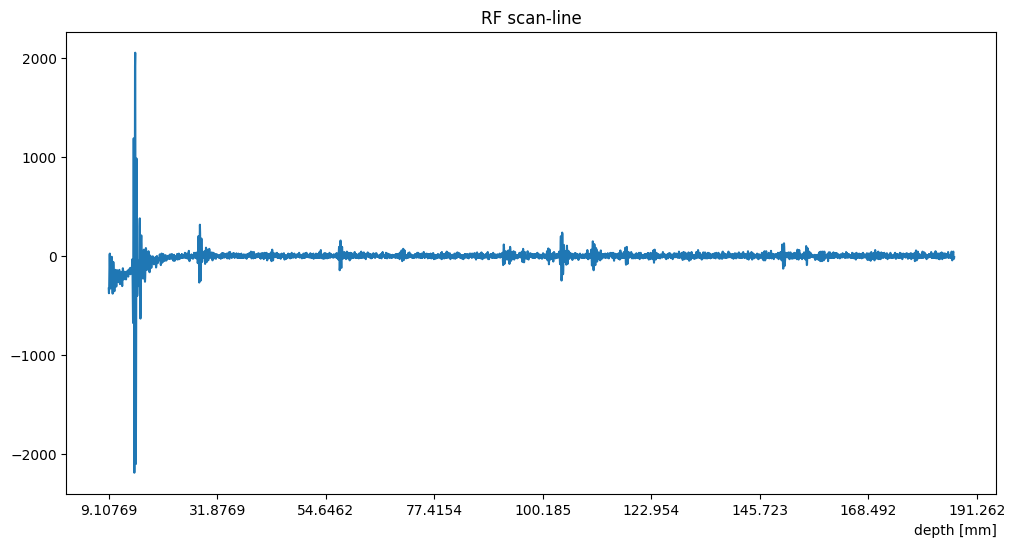

In [23]:
#%% PLOT A-SCAN
start_sample = 200  # cut first stron echo ('TX leakege' & interface echo)
scanline = 90   # select scanline to dsiplay

display_Ascan(arr[scanline, start_sample:], sample_offset=start_sample)

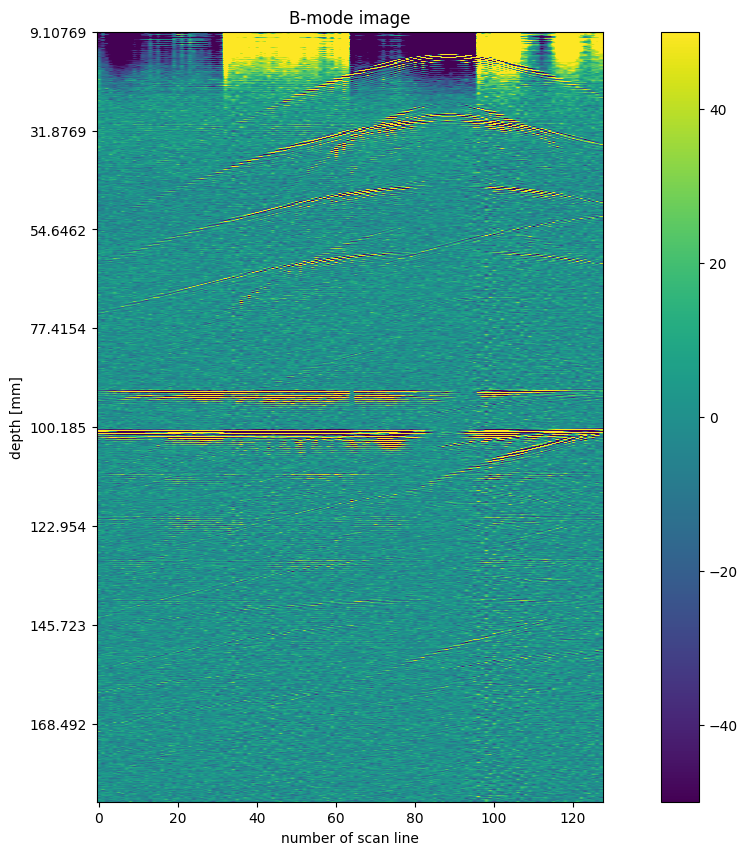

In [24]:
display_Bmode_from_RF(arr[:, start_sample:],
                      dynamic_range=50, from_sample=start_sample)

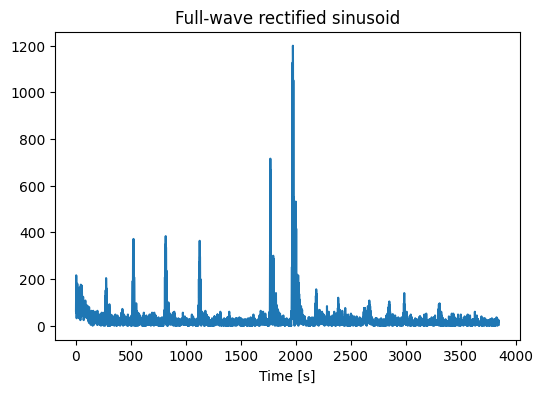

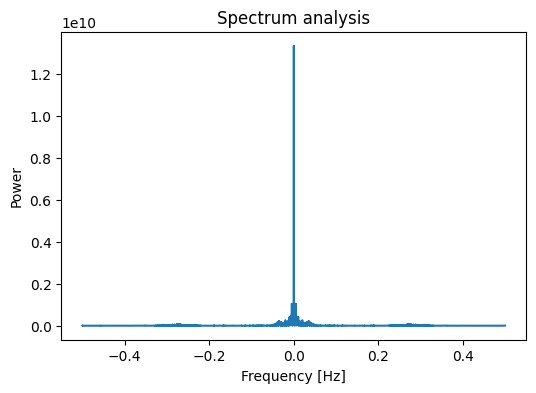

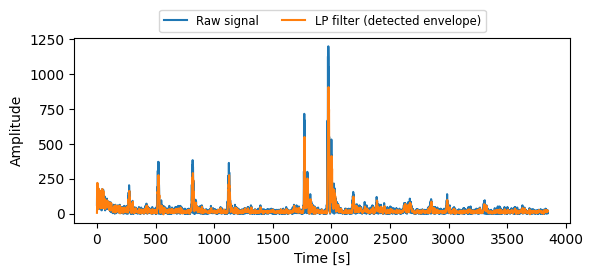

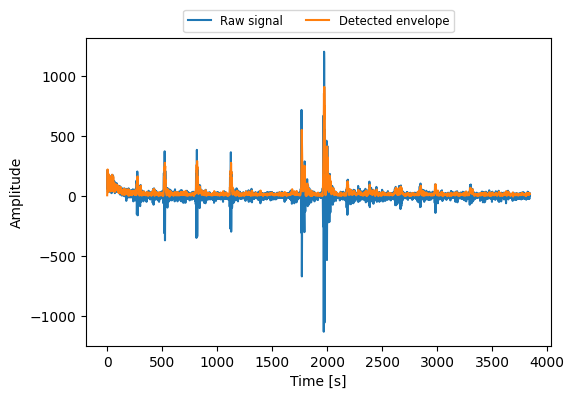

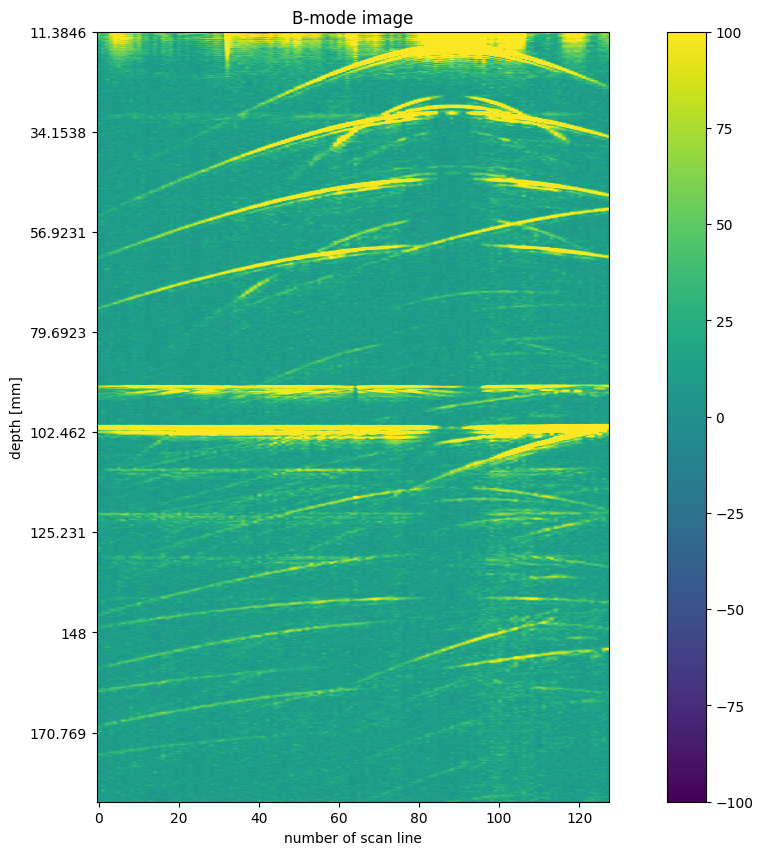

In [25]:
start_sample = 250  # cut echo from edge reflection

# select function from envelop_functions
selected_func = asynchronous_full_wave

display_video_env_detect(arr[:, start_sample:], selected_func, dynamic_range=100,
                         n_scan_display=50, from_sample=start_sample)

(1, 127, 4096, 2)
(127, 4096, 2)
(127, 4096)


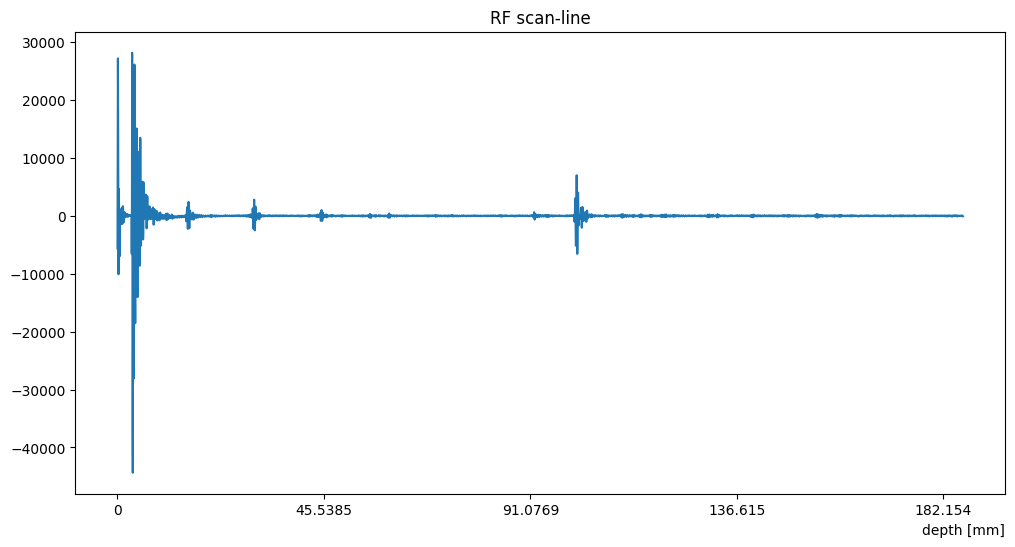

In [26]:
#%% LOAD RF DATA 2TX...16TX
arr = np.load(r'../data/ex1-pulse-echo/tx2rx2-v1-block.npy')  # 2 TX / 2 RX on V1 block
# arr = np.load(r'../data/ex1-pulse-echo/tx4rx4-v1-block.npy')  # 4 TX / 4 RX on V1 block
# arr = np.load(r'../data/ex1-pulse-echo/tx8rx8-v1-block.npy')  # 8 TX / 8 RX on V1 block
# arr = np.load(r'../data/ex1-pulse-echo/tx16rx16-v1-block.npy')    # 16 TX / 16 RX on V1 block

print(arr.shape)
arr = np.squeeze(arr)
print(arr.shape)

arr_new = np.sum(arr, axis=2)
print(arr_new.shape)

start_sample = 0
scanline = 90
display_Ascan(arr_new[scanline, start_sample:], norm=False)

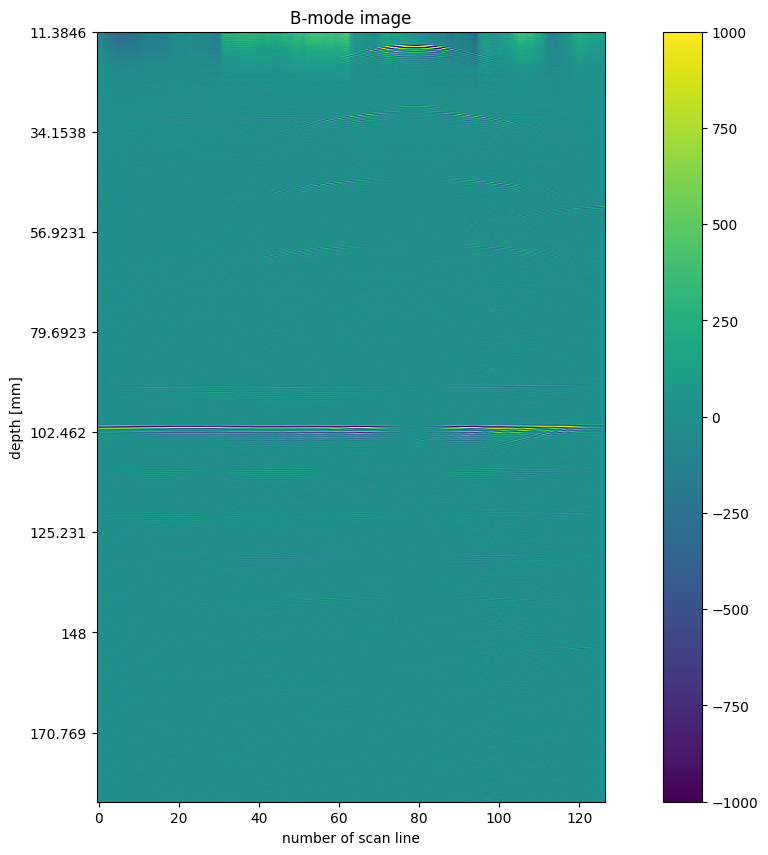

In [27]:
start_sample = 250 

display_Bmode_from_RF(arr_new[:,start_sample:], dynamic_range=1000, from_sample=start_sample)

## ENVELOP DETECTION

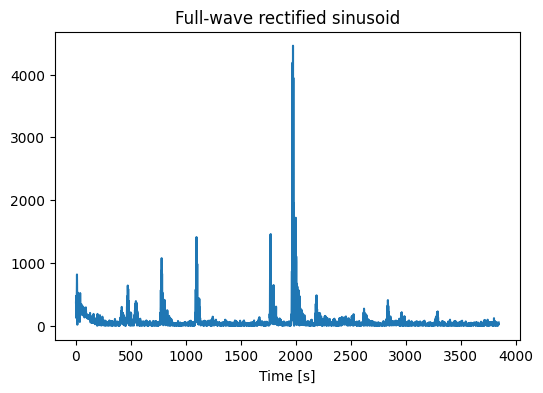

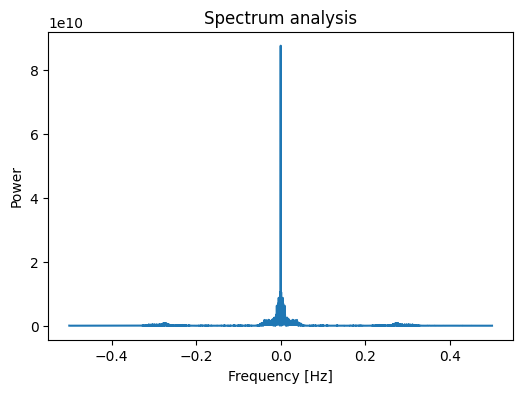

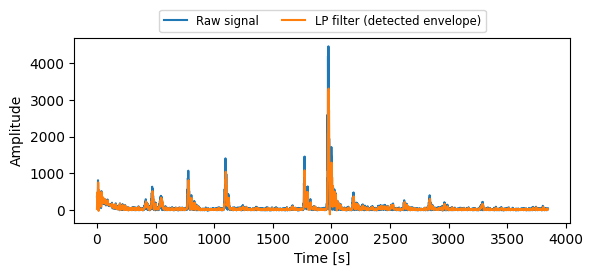

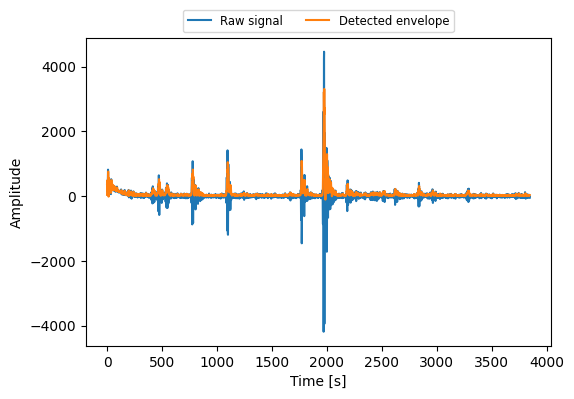

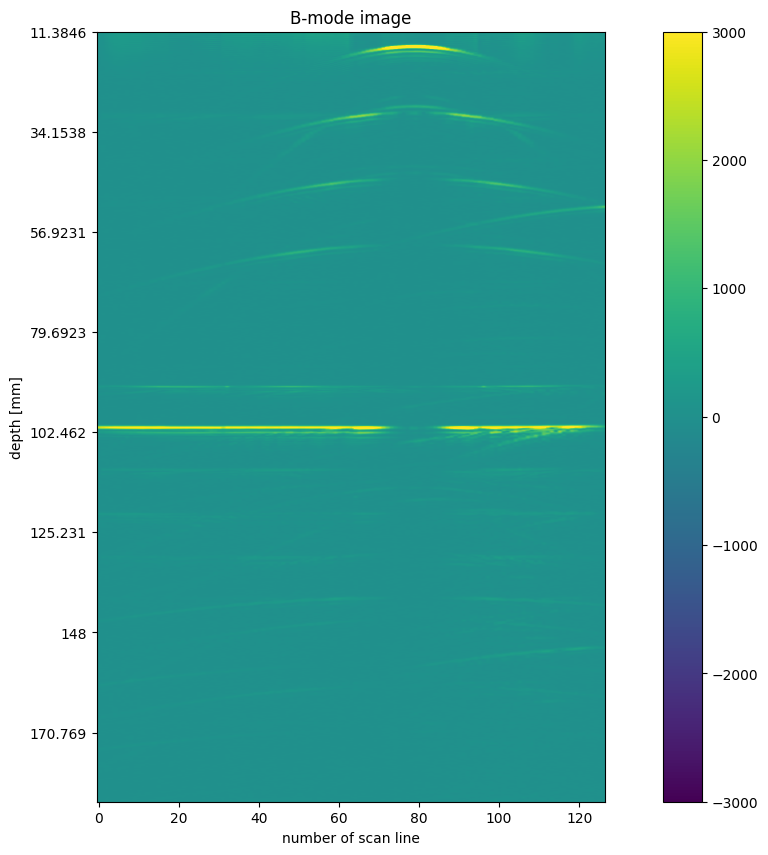

In [28]:
start_sample = 250

# select function from envelop_functions
selected_func = asynchronous_full_wave
display_video_env_detect(arr_new.astype(np.float32)[:, start_sample:], selected_func,
                         dynamic_range=3000, n_scan_display=50, from_sample=start_sample)

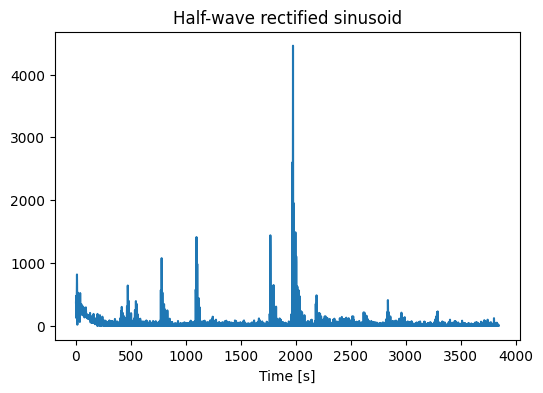

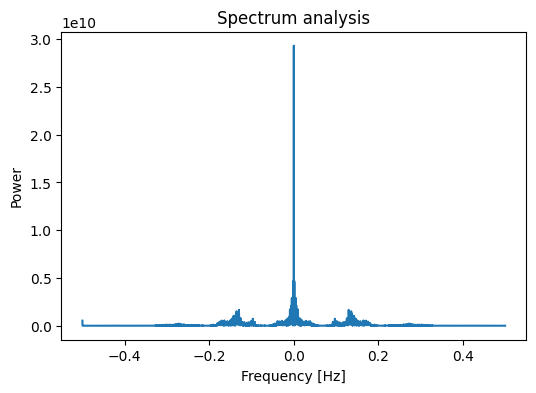

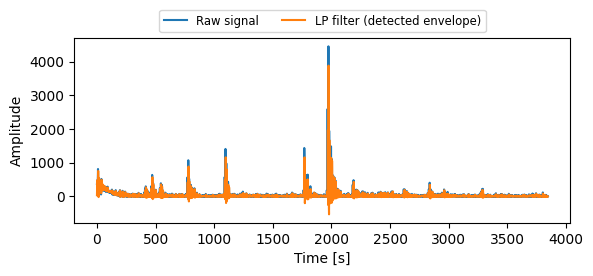

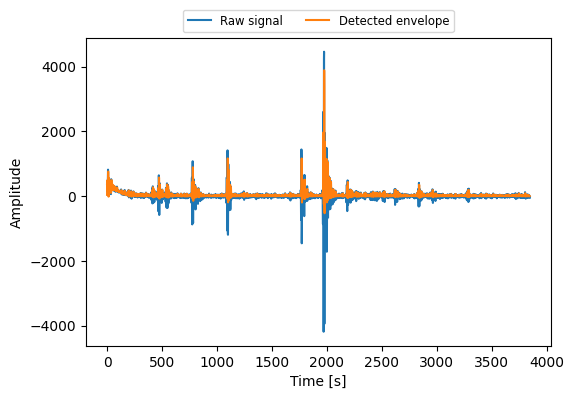

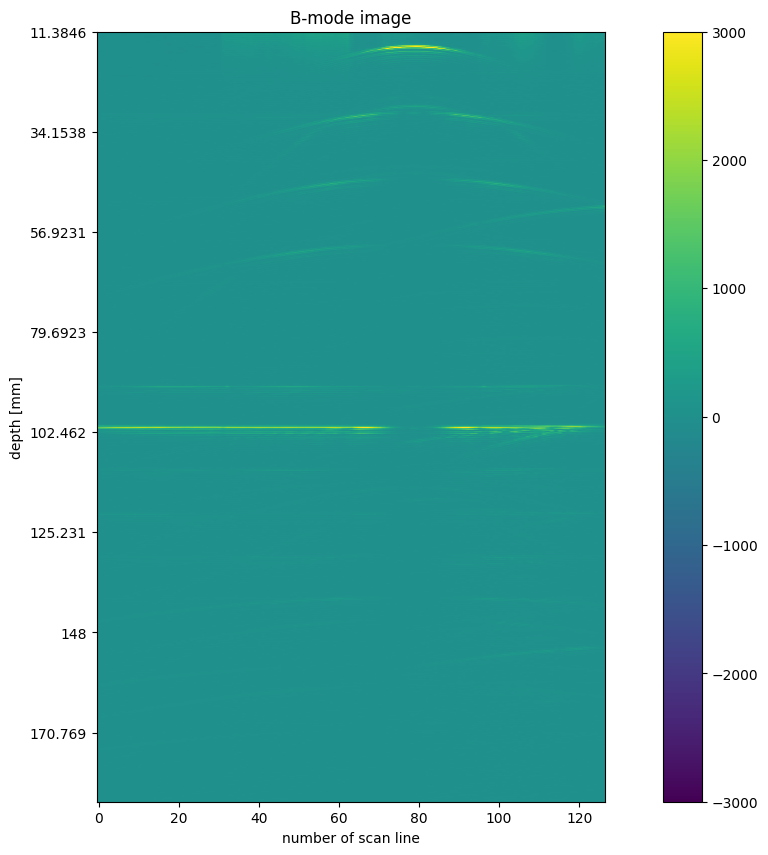

In [29]:
selected_func = asynchronous_half_wave
display_video_env_detect(arr_new.astype(np.float32)[:, start_sample:], selected_func,
                         dynamic_range=3000, n_scan_display=50, from_sample=start_sample)

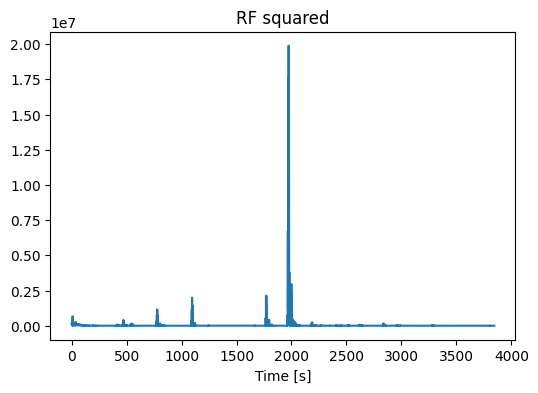

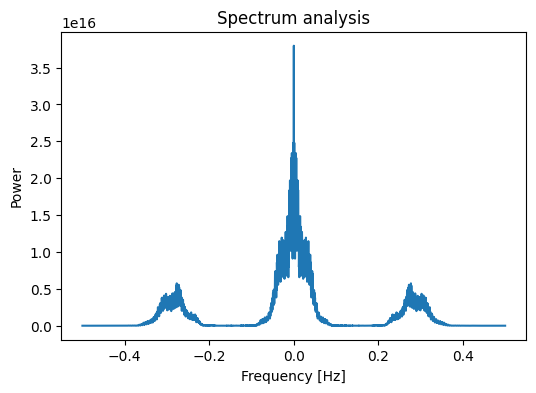

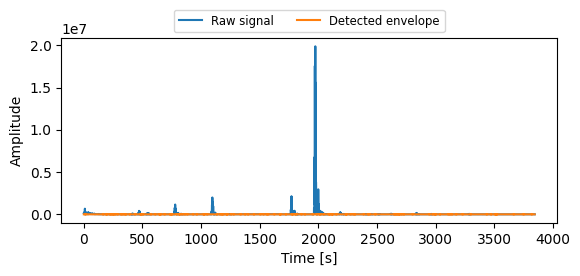

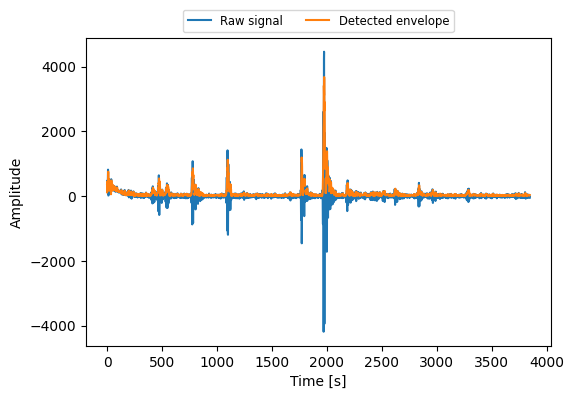

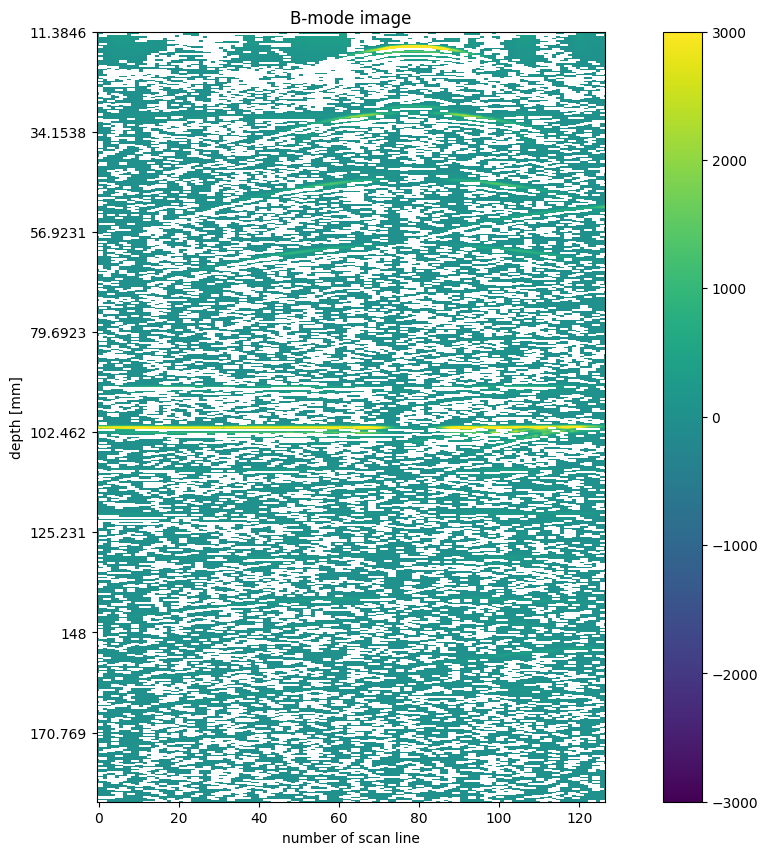

In [30]:
selected_func = asynchronous_real_square_law
display_video_env_detect(arr_new.astype(np.float32)[:, start_sample:], selected_func,
                         dynamic_range=3000, n_scan_display=50, from_sample=start_sample)

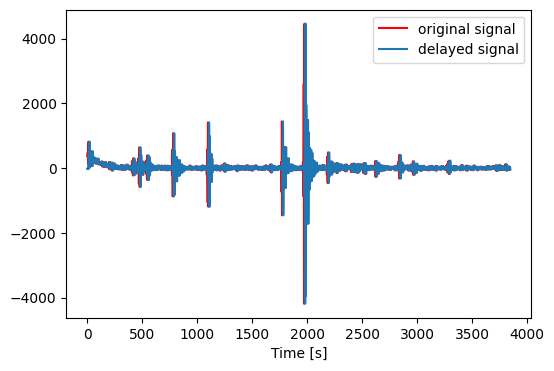

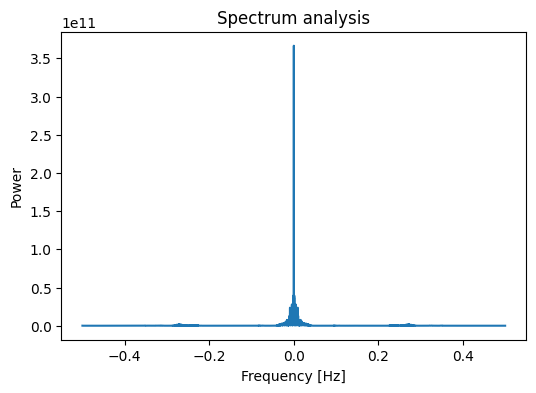

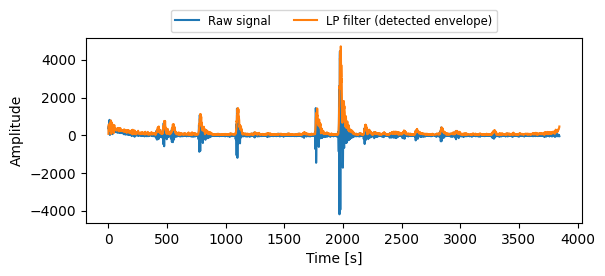

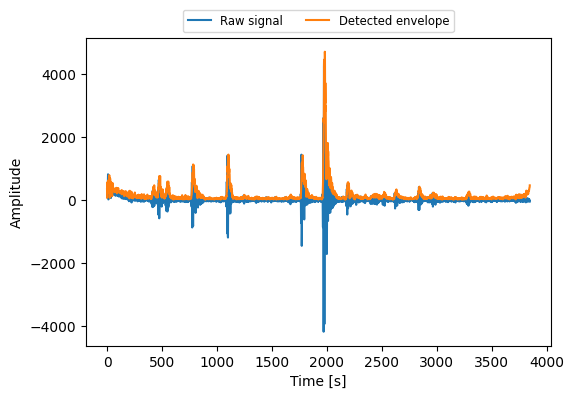

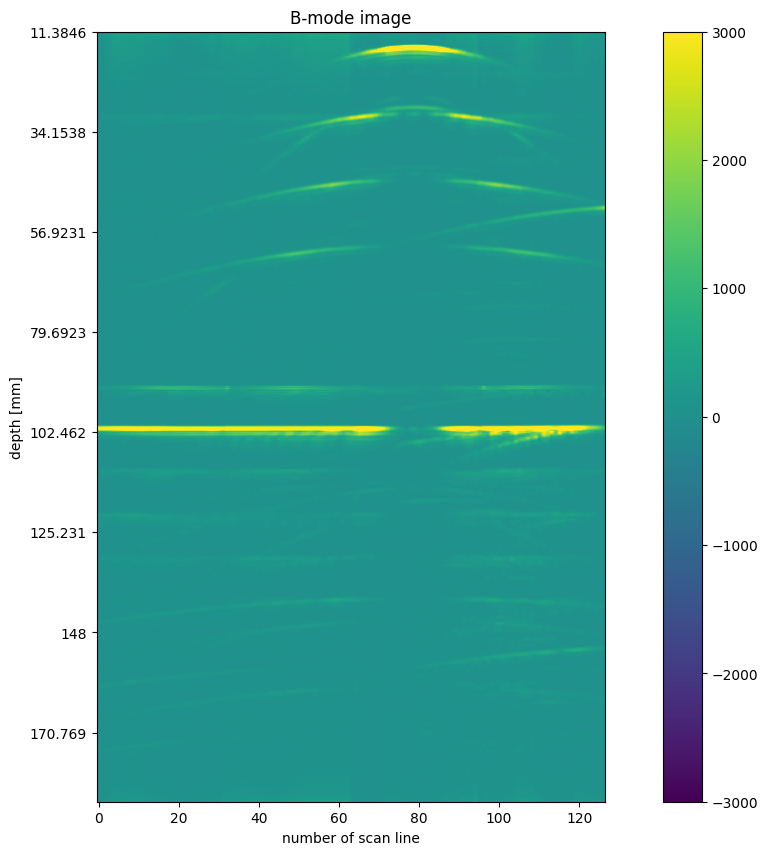

In [31]:
selected_func = asynchronous_complex_hilbert
display_video_env_detect(arr_new.astype(np.float32)[:, start_sample:], selected_func,
                         dynamic_range=3000, n_scan_display=50, from_sample=start_sample)

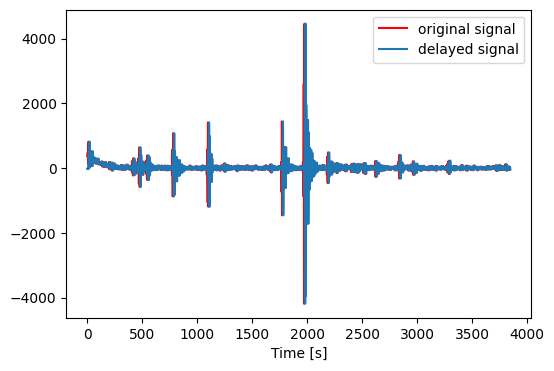

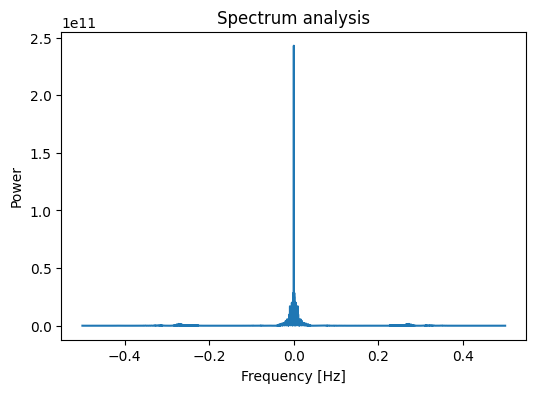

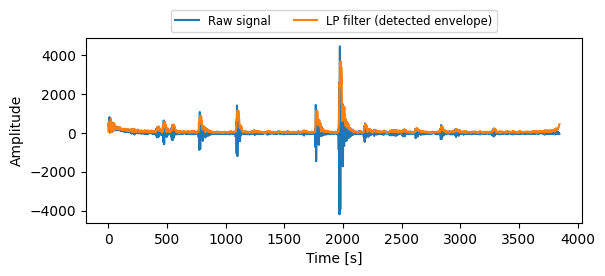

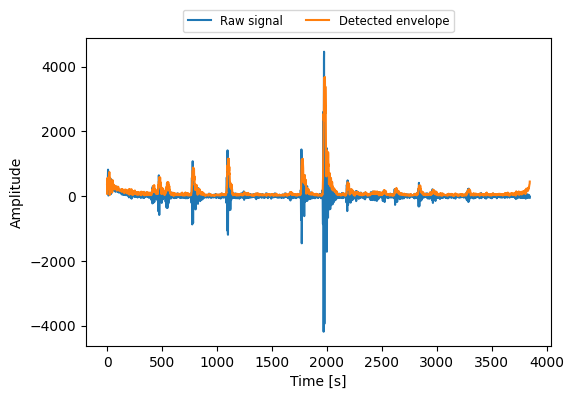

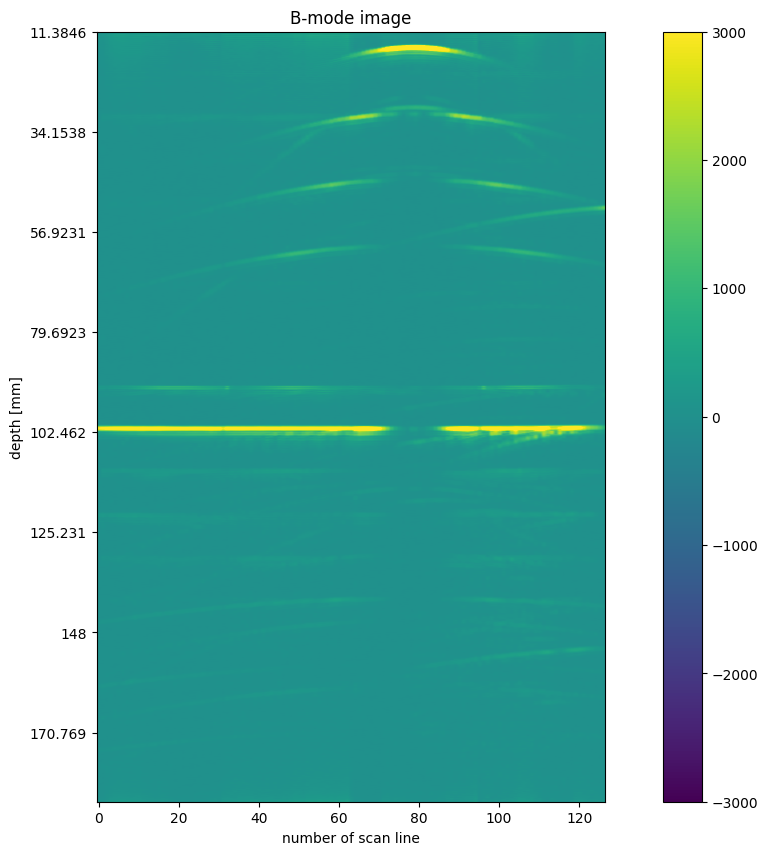

In [32]:
selected_func = asynchronous_complex_square_law
display_video_env_detect(arr_new.astype(np.float32)[:, start_sample:], selected_func,
                         dynamic_range=3000, n_scan_display=50, from_sample=start_sample)